In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv('drive/MyDrive/ML/census-income.csv')

In [17]:
data.head()

,Unnamed: 0,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,...,country_of_birth_father,country_of_birth_mother,country_of birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year,under_50k_over_50k
0,0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [19]:
data.columns

Index(['Unnamed: 0', 'age', 'class_of_worker', 'detailed_industry_recode',
       'detailed_occupation_recode', 'education', 'wage_per_hour',
       'enroll_in_edu_inst_last_wk', 'marital_stat', 'major_industry_code',
       'major_occupation_code', 'race', 'hispanic_origin', 'sex',
       'member_of_a_labor_union', 'reason_for_unemployment',
       'full_or_part time employment stat', 'capital_gains', 'capital_losses',
       'dividends_from_stocks', 'tax_filer_stat',
       'region_of_previous_residence', 'state_of_previous_residence',
       'detailed_household_and_family_stat',
       'detailed_household_summary_in_household', 'instance_weight',
       'migration_code_change_in_msa', 'migration_code_change in reg',
       'migration_code_move_within_reg', 'live_in_this_house_1_year_ago',
       'migration_prev_res_in_sunbelt', 'num_persons_worked_for_employer',
       'family_members_under_18', 'country_of_birth_father',
       'country_of_birth_mother', 'country_of birth_self', 'c

In [20]:
data.drop('Unnamed: 0',axis=1, inplace=True)
data.head()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year,under_50k_over_50k
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [21]:
data['under_50k_over_50k'].unique()

array([' - 50000.', ' 50000+.'], dtype=object)

In [22]:
data.isnull().sum()

age                                           0
class_of_worker                               0
detailed_industry_recode                      0
detailed_occupation_recode                    0
education                                     0
wage_per_hour                                 0
enroll_in_edu_inst_last_wk                    0
marital_stat                                  0
major_industry_code                           0
major_occupation_code                         0
race                                          0
hispanic_origin                               0
sex                                           0
member_of_a_labor_union                       0
reason_for_unemployment                       0
full_or_part time employment stat             0
capital_gains                                 0
capital_losses                                0
dividends_from_stocks                         0
tax_filer_stat                                0
region_of_previous_residence            

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         199523 non-null  int64  
 1   class_of_worker                             199523 non-null  object 
 2   detailed_industry_recode                    199523 non-null  int64  
 3   detailed_occupation_recode                  199523 non-null  int64  
 4   education                                   199523 non-null  object 
 5   wage_per_hour                               199523 non-null  int64  
 6   enroll_in_edu_inst_last_wk                  199523 non-null  object 
 7   marital_stat                                199523 non-null  object 
 8   major_industry_code                         199523 non-null  object 
 9   major_occupation_code                       199523 non-null  object 
 

In [24]:
data['under_50k_over_50k'] = le.fit_transform(data['under_50k_over_50k'])

In [25]:
data['under_50k_over_50k'].unique()

array([0, 1])

In [26]:
data.head(10)

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year,under_50k_over_50k
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,0
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0
5,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,...,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,0
6,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0
7,28,Private,4,40,High school graduate,0,Not in universe,Never married,Construction,Handlers equip cleaners etc,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,30,95,0
8,47,Local government,43,26,Some college but no degree,876,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,0
9,34,Private,4,37,Some college but no degree,0,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0


## Imabalnced Data

<Figure size 1440x720 with 0 Axes>

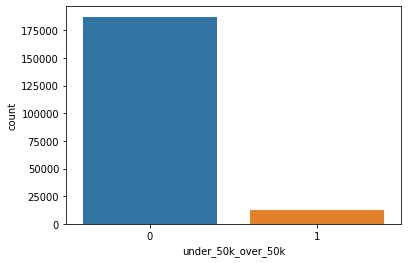

<Figure size 1440x720 with 0 Axes>

In [39]:
sns.countplot(x="under_50k_over_50k", data=data)
plt.figure(figsize=(20,10))

## balancing data through SMOTE

In [28]:
data['age'].unique()

In [30]:
data['class_of_worker'].unique()

array([' Not in universe', ' Self-employed-not incorporated', ' Private',
       ' Local government', ' Federal government',
       ' Self-employed-incorporated', ' State government',
       ' Never worked', ' Without pay'], dtype=object)

In [32]:
temp_with_5000Rows = data.head(5000)

<BarContainer object of 5000 artists>

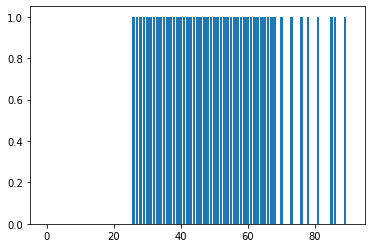

In [37]:
plt.bar(temp_with_5000Rows['age'],temp_with_5000Rows['under_50k_over_50k'])

In [ ]:
data["class_of_worker"] = data["class_of_worker"].str.replace(" ", "", n = 1)

In [ ]:
data['class_of_worker'].unique()

array(['Not in universe', 'Self-employed-not incorporated', 'Private',
       'Local government', 'Federal government',
       'Self-employed-incorporated', 'State government', 'Never worked',
       'Without pay'], dtype=object)

In [ ]:
data["education"] = data["education"].str.replace(" ", "", n = 1)

In [ ]:
data['education'].unique()

array(['High school graduate', 'Some college but no degree', '10th grade',
       'Children', 'Bachelors degree(BA AB BS)',
       'Masters degree(MA MS MEng MEd MSW MBA)', 'Less than 1st grade',
       'Associates degree-academic program', '7th and 8th grade',
       '12th grade no diploma', 'Associates degree-occup /vocational',
       'Prof school degree (MD DDS DVM LLB JD)', '5th or 6th grade',
       '11th grade', 'Doctorate degree(PhD EdD)', '9th grade',
       '1st 2nd 3rd or 4th grade'], dtype=object)

In [ ]:
data["enroll_in_edu_inst_last_wk"] = data["enroll_in_edu_inst_last_wk"].str.replace(" ", "", n = 1)

In [ ]:
data["marital_stat"] = data["marital_stat"].str.replace(" ", "", n = 1)

In [ ]:
data["major_industry_code"] = data["major_industry_code"].str.replace(" ", "", n = 1)

In [ ]:
data["major_occupation_code"] = data["major_occupation_code"].str.replace(" ", "", n = 1)

In [ ]:
data["race"] = data["race"].str.replace(" ", "", n = 1)

In [ ]:
data["hispanic_origin"] = data["hispanic_origin"].str.replace(" ", "", n = 1)

In [ ]:
data["sex"] = data["sex"].str.replace(" ", "", n = 1)

In [ ]:
data["member_of_a_labor_union"] = data["member_of_a_labor_union"].str.replace(" ", "", n = 1)

In [ ]:
data["reason_for_unemployment"] = data["reason_for_unemployment"].str.replace(" ", "", n = 1)

In [ ]:
data["full_or_part time employment stat"] = data["full_or_part time employment stat"].str.replace(" ", "", n = 1)

In [ ]:
data["tax_filer_stat"] = data["tax_filer_stat"].str.replace(" ", "", n = 1)

In [ ]:
data["region_of_previous_residence"] = data["region_of_previous_residence"].str.replace(" ", "", n = 1)

In [ ]:
data["state_of_previous_residence"] = data["state_of_previous_residence"].str.replace(" ", "", n = 1)

In [ ]:
data["detailed_household_and_family_stat"] = data["detailed_household_and_family_stat"].str.replace(" ", "", n = 1)

In [ ]:
data["live_in_this_house_1_year_ago"] = data["live_in_this_house_1_year_ago"].str.replace(" ", "", n = 1)

In [ ]:
data["family_members_under_18"] = data["family_members_under_18"].str.replace(" ", "", n = 1)

In [ ]:
data["country_of_birth_father"] = data["country_of_birth_father"].str.replace(" ", "", n = 1)

In [ ]:
data["country_of_birth_mother"] = data["country_of_birth_mother"].str.replace(" ", "", n = 1)

In [ ]:
data["country_of birth_self"] = data["country_of birth_self"].str.replace(" ", "", n = 1)

In [ ]:
data["citizenship"] = data["citizenship"].str.replace(" ", "", n = 1)

In [ ]:
data["fill_inc_questionnaire_for_veteran's_admin"] = data["fill_inc_questionnaire_for_veteran's_admin"].str.replace(" ", "", n = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         199523 non-null  int64  
 1   class_of_worker                             199523 non-null  object 
 2   detailed_industry_recode                    199523 non-null  int64  
 3   detailed_occupation_recode                  199523 non-null  int64  
 4   education                                   199523 non-null  object 
 5   wage_per_hour                               199523 non-null  int64  
 6   enroll_in_edu_inst_last_wk                  199523 non-null  object 
 7   marital_stat                                199523 non-null  object 
 8   major_industry_code                         199523 non-null  object 
 9   major_occupation_code                       199523 non-null  object 
 

### Removing columns with no significant contribution: 
migration_code_change_in_msa, migration_code_change in reg, migration_code_move_within_reg, migration_prev_res_in_sunbelt

because approximately 50% of it's rows have null values.

In [ ]:
data.drop(['migration_code_change_in_msa', 'migration_code_change in reg', 'migration_code_move_within_reg',
                  'migration_prev_res_in_sunbelt'], inplace=True, axis=1)

In [ ]:
data.isnull().sum()

age                                           0
class_of_worker                               0
detailed_industry_recode                      0
detailed_occupation_recode                    0
education                                     0
wage_per_hour                                 0
enroll_in_edu_inst_last_wk                    0
marital_stat                                  0
major_industry_code                           0
major_occupation_code                         0
race                                          0
hispanic_origin                               0
sex                                           0
member_of_a_labor_union                       0
reason_for_unemployment                       0
full_or_part time employment stat             0
capital_gains                                 0
capital_losses                                0
dividends_from_stocks                         0
tax_filer_stat                                0
region_of_previous_residence            

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

age                                           0
class_of_worker                               0
detailed_industry_recode                      0
detailed_occupation_recode                    0
education                                     0
wage_per_hour                                 0
enroll_in_edu_inst_last_wk                    0
marital_stat                                  0
major_industry_code                           0
major_occupation_code                         0
race                                          0
hispanic_origin                               0
sex                                           0
member_of_a_labor_union                       0
reason_for_unemployment                       0
full_or_part time employment stat             0
capital_gains                                 0
capital_losses                                0
dividends_from_stocks                         0
tax_filer_stat                                0
region_of_previous_residence            

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,detailed_industry_recode,detailed_occupation_recode,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,instance_weight,num_persons_worked_for_employer,own_business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,under_50k_over_50k
age,1.000000,0.157822,0.117414,0.036938,0.053590,0.063351,0.104976,-0.001611,0.140887,-0.002265,0.674844,0.206181,0.004413,0.135720
detailed_industry_recode,0.157822,1.000000,0.563493,0.165980,0.066017,0.072586,0.012774,0.029388,0.642096,0.252694,0.476475,0.754472,0.003430,0.196190
detailed_occupation_recode,0.117414,0.563493,1.000000,0.194498,0.002534,0.043680,-0.026726,0.027047,0.515554,0.228952,0.438680,0.655613,-0.003140,0.013414
wage_per_hour,0.036938,0.165980,0.194498,1.000000,-0.001082,0.010993,-0.005731,0.012353,0.191543,0.054051,0.113094,0.195687,0.002283,0.024528
capital_gains,0.053590,0.066017,0.002534,-0.001082,1.000000,-0.012700,0.131476,0.002549,0.058015,0.015048,0.051530,0.083549,0.005243,0.240725
capital_losses,0.063351,0.072586,0.043680,0.010993,-0.012700,1.000000,0.042427,0.008052,0.084255,0.024116,0.075391,0.100762,0.000096,0.147417
dividends_from_stocks,0.104976,0.012774,-0.026726,-0.005731,0.131476,0.042427,1.000000,-0.000009,0.007206,-0.004885,0.054585,0.013823,0.001913,0.175779
instance_weight,-0.001611,0.029388,0.027047,0.012353,0.002549,0.008052,-0.000009,1.000000,0.042778,0.012328,0.040507,0.029240,0.011765,0.014463
num_persons_worked_for_employer,0.140887,0.642096,0.515554,0.191543,0.058015,0.084255,0.007206,0.042778,1.000000,0.240553,0.463334,0.747302,0.018774,0.222684
own_business_or_self_employed,-0.002265,0.252694,0.228952,0.054051,0.015048,0.024116,-0.004885,0.012328,0.240553,1.000000,0.177448,0.265872,0.007377,0.040473


### Label Encoder

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199523 entries, 0 to 199522
Data columns (total 38 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         199523 non-null  int64  
 1   class_of_worker                             199523 non-null  object 
 2   detailed_industry_recode                    199523 non-null  int64  
 3   detailed_occupation_recode                  199523 non-null  int64  
 4   education                                   199523 non-null  object 
 5   wage_per_hour                               199523 non-null  int64  
 6   enroll_in_edu_inst_last_wk                  199523 non-null  object 
 7   marital_stat                                199523 non-null  object 
 8   major_industry_code                         199523 non-null  object 
 9   major_occupation_code                       199523 non-null  object 
 

In [ ]:
data['class_of_worker'] = le.fit_transform(data['class_of_worker'])
data['education'] = le.fit_transform(data['education'])
data['enroll_in_edu_inst_last_wk'] = le.fit_transform(data['enroll_in_edu_inst_last_wk'])
data['marital_stat'] = le.fit_transform(data['marital_stat'])
data['major_industry_code'] = le.fit_transform(data['major_industry_code'])
data['major_occupation_code'] = le.fit_transform(data['major_occupation_code'])
data['race'] = le.fit_transform(data['race'])
data['hispanic_origin'] = le.fit_transform(data['hispanic_origin'])
data['sex'] = le.fit_transform(data['sex'])

data['member_of_a_labor_union'] = le.fit_transform(data['member_of_a_labor_union'])
data['reason_for_unemployment'] = le.fit_transform(data['reason_for_unemployment'])
data['full_or_part time employment stat'] = le.fit_transform(data['full_or_part time employment stat'])
data['tax_filer_stat'] = le.fit_transform(data['tax_filer_stat'])
data['region_of_previous_residence'] = le.fit_transform(data['region_of_previous_residence'])
data['state_of_previous_residence'] = le.fit_transform(data['state_of_previous_residence'])
data['detailed_household_and_family_stat'] = le.fit_transform(data['detailed_household_and_family_stat'])
data['detailed_household_summary_in_household'] = le.fit_transform(data['detailed_household_summary_in_household'])

data['live_in_this_house_1_year_ago'] = le.fit_transform(data['live_in_this_house_1_year_ago'])
data['family_members_under_18'] = le.fit_transform(data['family_members_under_18'])
data['country_of_birth_father'] = le.fit_transform(data['country_of_birth_father'])
data['country_of_birth_mother'] = le.fit_transform(data['country_of_birth_mother'])
data['country_of birth_self'] = le.fit_transform(data['country_of birth_self'])
data['citizenship'] = le.fit_transform(data['citizenship'])
data["fill_inc_questionnaire_for_veteran's_admin"] = le.fit_transform(data["fill_inc_questionnaire_for_veteran's_admin"])
#data['under_50k_over_50k'] = le.fit_transform(data['under_50k_over_50k'])

In [ ]:
data.to_csv("censusincome.csv")

In [ ]:
data['under_50k_over_50k'].unique()

array([0, 1])

In [ ]:
data.isnull().sum()

age                                           0
class_of_worker                               0
detailed_industry_recode                      0
detailed_occupation_recode                    0
education                                     0
wage_per_hour                                 0
enroll_in_edu_inst_last_wk                    0
marital_stat                                  0
major_industry_code                           0
major_occupation_code                         0
race                                          0
hispanic_origin                               0
sex                                           0
member_of_a_labor_union                       0
reason_for_unemployment                       0
full_or_part time employment stat             0
capital_gains                                 0
capital_losses                                0
dividends_from_stocks                         0
tax_filer_stat                                0
region_of_previous_residence            

In [ ]:
newdata = data[['weeks_worked_in_year', 'num_persons_worked_for_employer', 'capital_gains','dividends_from_stocks', 'family_members_under_18', 'veterans_benefits']]

In [ ]:
corr = newdata.corr()
corr.style.background_gradient(cmap='coolwarm')

,weeks_worked_in_year,num_persons_worked_for_employer,capital_gains,dividends_from_stocks,family_members_under_18,veterans_benefits
weeks_worked_in_year,1.000000,0.747302,0.083549,0.013823,0.529657,0.532279
num_persons_worked_for_employer,0.747302,1.000000,0.058015,0.007206,0.443186,0.463334
capital_gains,0.083549,0.058015,1.000000,0.131476,0.054113,0.051530
dividends_from_stocks,0.013823,0.007206,0.131476,1.000000,0.058082,0.054585
family_members_under_18,0.529657,0.443186,0.054113,0.058082,1.000000,0.843168
veterans_benefits,0.532279,0.463334,0.051530,0.054585,0.843168,1.000000


In [ ]:
newdata.head()

,weeks_worked_in_year,num_persons_worked_for_employer,capital_gains,dividends_from_stocks,family_members_under_18,veterans_benefits
0,0,0,0,0,4,2
1,52,1,0,0,4,2
2,0,0,0,0,4,2
3,0,0,0,0,0,0
4,0,0,0,0,0,0


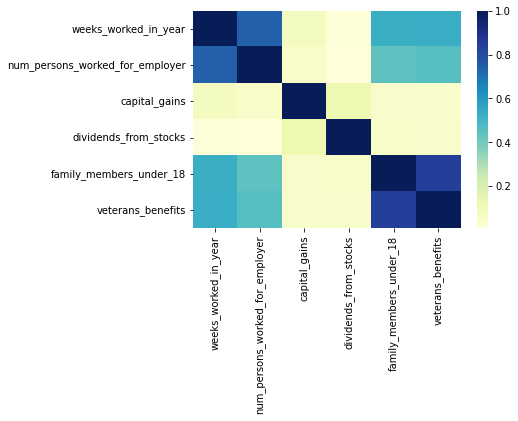

In [ ]:
# newdata = newdata.pivot('weeks_worked_in_year', 'num_persons_worked_for_employer', 'capital_gains','dividends_from_stocks', 'family_members_under_18', 'veterans_benefits')
sns.heatmap(newdata.corr(),cmap="YlGnBu")

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_a_labor_union,reason_for_unemployment,full_or_part time employment stat,capital_gains,capital_losses,dividends_from_stocks,tax_filer_stat,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,instance_weight,live_in_this_house_1_year_ago,num_persons_worked_for_employer,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year,under_50k_over_50k
age,1.000000,0.087751,0.157822,0.117414,0.019436,0.036938,0.166565,-0.295850,-0.060803,0.010021,0.083260,-0.103743,-0.052560,-0.020773,-0.002896,0.223387,0.053590,0.063351,0.104976,-0.311794,-0.007131,0.056969,0.529369,0.479778,-0.001611,0.094018,0.140887,0.691274,-0.095728,-0.083374,-0.068469,-0.051689,-0.002265,-0.065730,0.674844,0.206181,0.004413,0.135720
class_of_worker,0.087751,1.000000,0.305050,0.377095,0.072739,0.036878,-0.022285,-0.166327,-0.136778,0.056247,0.055184,-0.037743,0.080021,-0.091847,0.028661,0.054658,0.049055,0.044683,0.015757,-0.109688,-0.003672,-0.007924,0.124307,0.093539,0.009114,-0.007711,0.169917,0.235105,0.008448,0.006966,-0.030828,-0.033871,0.121951,0.007673,0.247322,0.384685,-0.001244,0.099767
detailed_industry_recode,0.157822,0.305050,1.000000,0.563493,0.179267,0.165980,-0.042954,-0.311821,-0.027164,0.118254,0.026234,-0.057725,-0.025911,-0.200757,0.048931,0.104898,0.066017,0.072586,0.012774,-0.221897,0.001263,-0.015505,0.288142,0.227360,0.029388,-0.018274,0.642096,0.454443,0.036412,0.031556,-0.031001,-0.022274,0.252694,0.000196,0.476475,0.754472,0.003430,0.196190
detailed_occupation_recode,0.117414,0.377095,0.563493,1.000000,0.072849,0.194498,-0.043606,-0.262534,-0.187754,0.074611,0.024634,0.002744,0.138841,-0.140415,0.038242,0.123459,0.002534,0.043680,-0.026726,-0.167021,0.002880,-0.018977,0.188779,0.132426,0.027047,-0.020632,0.515554,0.408644,0.027968,0.022410,-0.050206,-0.078001,0.228952,-0.002050,0.438680,0.655613,-0.003140,0.013414
education,0.019436,0.072739,0.179267,0.072849,1.000000,0.046064,0.017986,-0.137404,-0.035434,-0.017060,0.037215,-0.101863,-0.001576,-0.038207,-0.002989,-0.029335,0.037643,0.030568,0.034058,-0.102530,-0.001273,-0.000515,0.091482,0.069258,0.022017,-0.006122,0.170174,0.148187,0.051352,0.049210,0.055674,0.094450,0.077165,-0.019359,0.004012,0.206955,0.002038,0.098068
wage_per_hour,0.036938,0.036878,0.165980,0.194498,0.046064,1.000000,-0.000131,-0.080786,-0.034042,0.026506,0.006141,-0.030282,0.023230,-0.308580,-0.006063,0.008526,-0.001082,0.010993,-0.005731,-0.057911,-0.002723,0.007250,0.063540,0.050260,0.012353,0.004259,0.191543,0.111323,0.025864,0.021858,0.007548,0.009645,0.054051,-0.000293,0.113094,0.195687,0.002283,0.024528
enroll_in_edu_inst_last_wk,0.166565,-0.022285,-0.042954,-0.043606,0.017986,-0.000131,1.000000,-0.153375,-0.039844,-0.010536,0.018020,0.001679,0.001779,0.029299,-0.016430,-0.059300,0.018985,0.008765,0.018474,-0.204339,0.002734,0.011709,0.227402,0.264646,-0.021797,0.011235,-0.060929,0.002490,-0.007928,-0.002527,-0.003445,-0.002706,-0.085535,-0.010362,-0.138344,0.023824,0.002115,0.059848
marital_stat,-0.295850,-0.166327,-0.311821,-0.262534,-0.137404,-0.080786,-0.153375,1.000000,0.103234,-0.028232,-0.078023,0.046363,-0.042069,0.067726,0.004849,-0.098594,-0.051685,-0.043947,-0.030482,0.513778,-0.005345,-0.005047,-0.451024,-0.434075,-0.002185,-0.015064,-0.307960,-0.415727,-0.015835,-0.016492,0.033123,0.031705,-0.086227,0.025481,-0.391808,-0.396805,-0.000666,-0.154495
major_industry_code,-0.060803,-0.136778,-0.027164,-0.187754,-0.035434,-0.034042,-0.039844,0.103234,1.000000,0.115280,-0.025363,0.008775,-0.052164,0.016807,0.009113,-0.041883,-0.021864,-0.024587,-0.00490

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 1440x720 with 0 Axes>

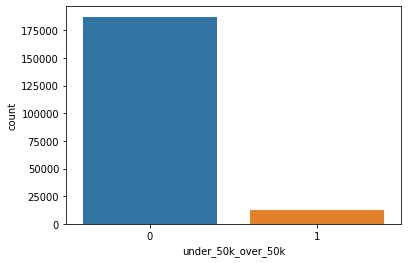

<Figure size 1440x720 with 0 Axes>

In [ ]:
sns.countplot(x="under_50k_over_50k", data=data)
plt.figure(figsize=(20,10))

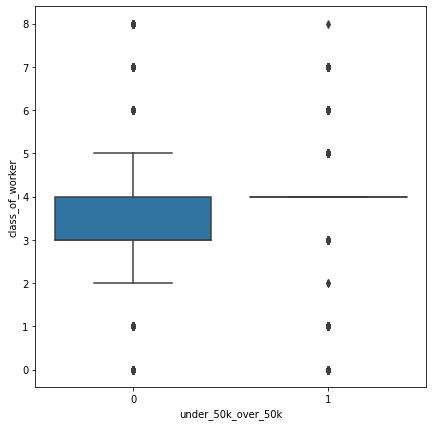

In [ ]:
plt.figure(figsize=(7,7))
ax = sns.boxplot(y="class_of_worker",x='under_50k_over_50k', data=data)

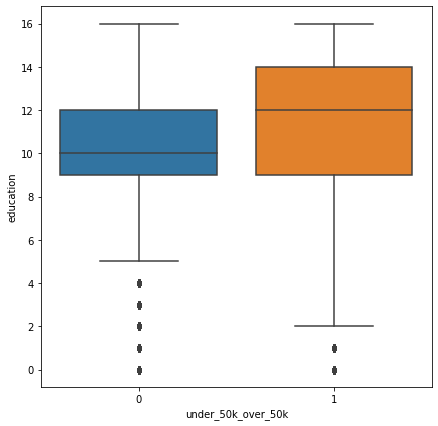

In [ ]:
plt.figure(figsize=(7,7))
ax = sns.boxplot(y="education",x='under_50k_over_50k', data=data)

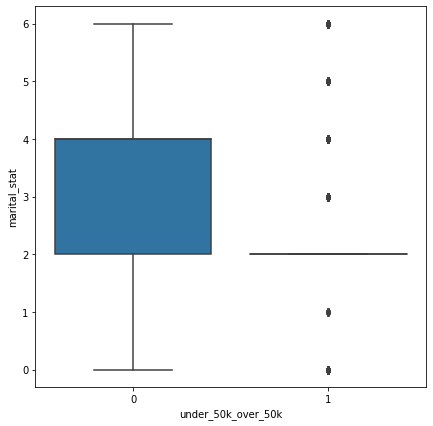

In [ ]:
plt.figure(figsize=(7,7))
ax = sns.boxplot(y="marital_stat",x='under_50k_over_50k', data=data)

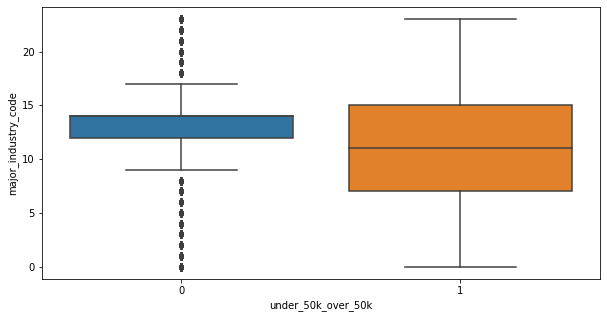

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="major_industry_code",x='under_50k_over_50k', data=data)

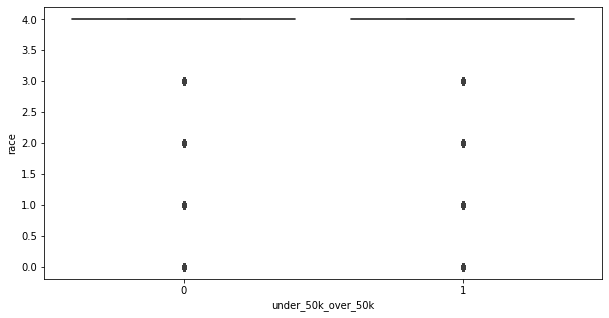

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="race",x='under_50k_over_50k', data=data)

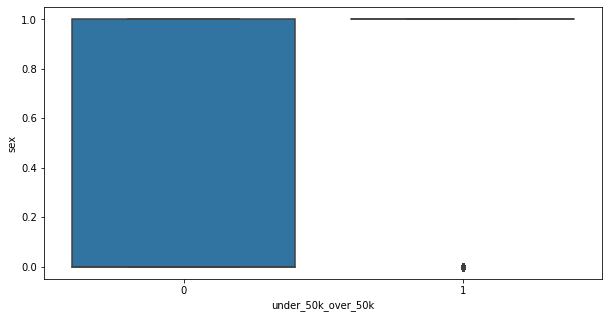

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="sex",x='under_50k_over_50k', data=data)

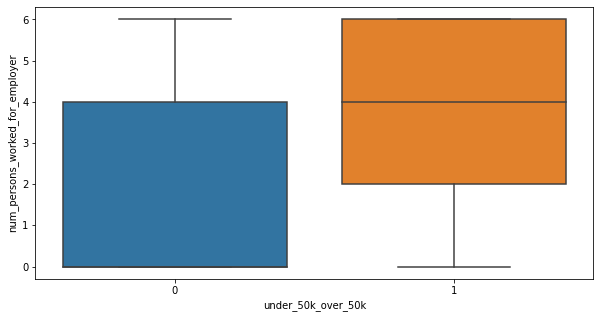

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="num_persons_worked_for_employer",x='under_50k_over_50k', data=data)

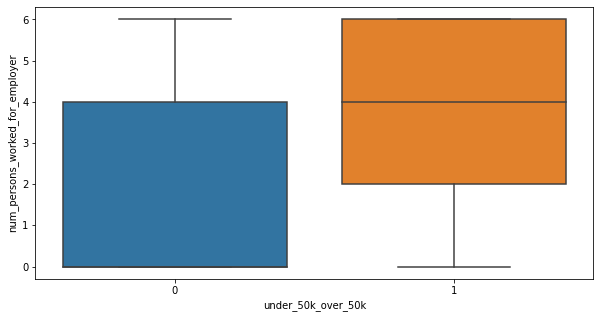

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(y="num_persons_worked_for_employer",x='under_50k_over_50k', data=data)

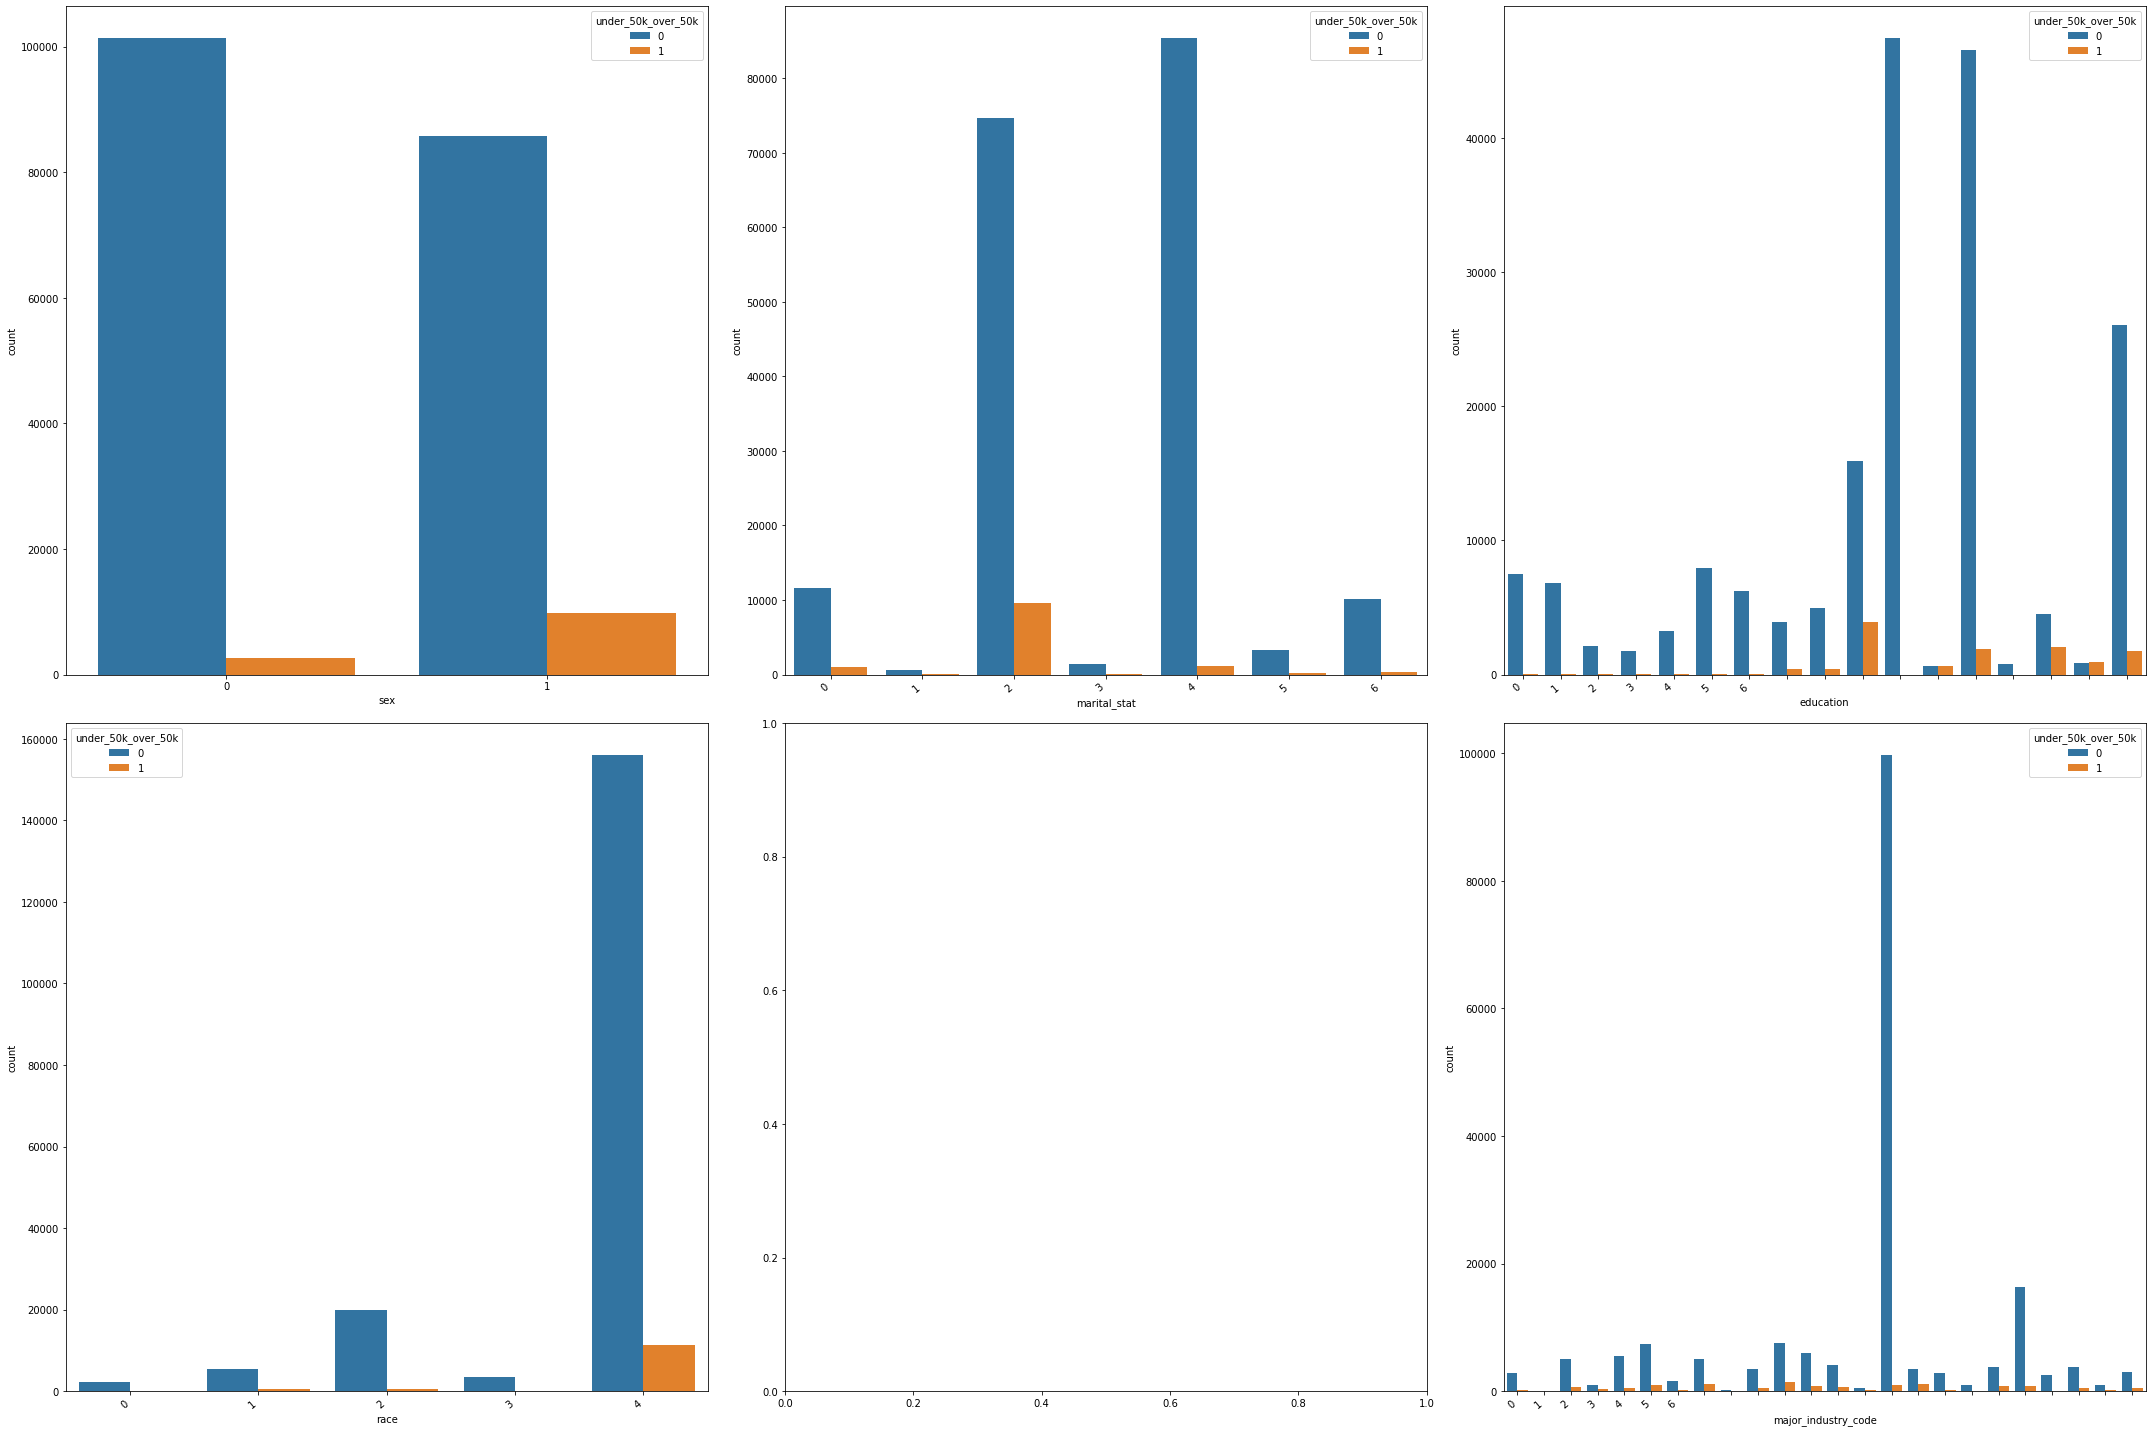

In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(30,20))
sns.countplot(x="sex", data=data,hue="under_50k_over_50k",ax = ax[0][0])
cp = sns.countplot(x="marital_stat", data=data,hue="under_50k_over_50k",ax = ax[0][1])
cp.set_xticklabels(cp.get_xticklabels(), rotation=40, ha="right")
cp2 = sns.countplot(x="education", data=data,hue="under_50k_over_50k",ax = ax[0][2])
cp2.set_xticklabels(cp.get_xticklabels(), rotation=40, ha="right")
cp3 = sns.countplot(x="race", data=data,hue="under_50k_over_50k",ax = ax[1][0])
cp3.set_xticklabels(cp.get_xticklabels(), rotation=40, ha="right")
cp4 = sns.countplot(x="major_industry_code", data=data,hue="under_50k_over_50k",ax = ax[1][2])
cp4.set_xticklabels(cp.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


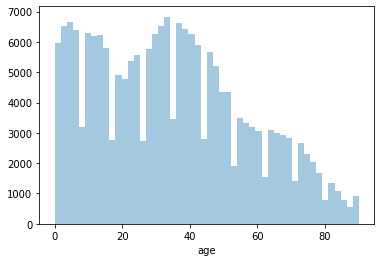

In [ ]:
sns.distplot(data['age'],kde = False,bins = 50)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


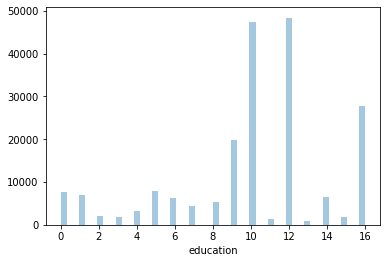

In [ ]:
sns.distplot(data['education'],kde = False)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


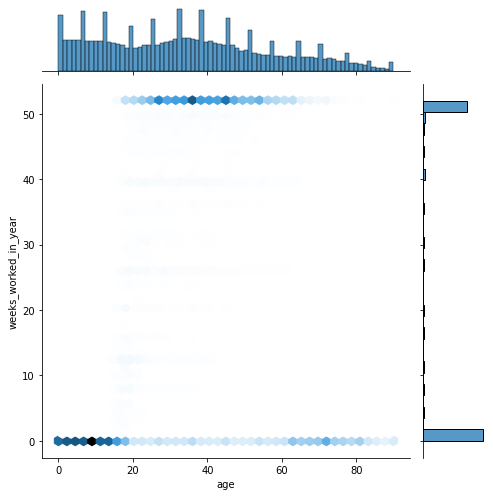

In [ ]:
sns.jointplot(x ="age", y="weeks_worked_in_year", data=data,kind="hex",size = 7)

The top 6 features with highest correlation with target variable are 'weeks_worked_in_year', 'num_persons_worked_for_employer', 'capital_gains', 'dividends_from_stocks', ' family_members_under_18' and 'veterans_benefits'.

In [ ]:
X = data[['weeks_worked_in_year', 'num_persons_worked_for_employer', 'capital_gains','dividends_from_stocks', 'family_members_under_18', 'veterans_benefits']]
Y = data['under_50k_over_50k']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X.values,Y.values, test_size=0.3, random_state=40)

In [ ]:
print(X.shape,Y.shape)

(199523, 6) (199523,)


In [ ]:
print(X_train.shape,Y_train.shape)

(139666, 6) (139666,)


In [ ]:
print(X_test.shape,Y_test.shape)

(59857, 6) (59857,)


In [ ]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(X, Y)
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [ ]:
oversampled.head()

,under_50k_over_50k,weeks_worked_in_year,num_persons_worked_for_employer,capital_gains,dividends_from_stocks,family_members_under_18,veterans_benefits
0,0,0,0,0,0,4,2
1,0,52,1,0,0,4,2
2,0,0,0,0,0,4,2
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


<Figure size 1440x720 with 0 Axes>

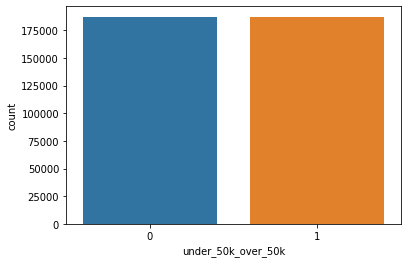

<Figure size 1440x720 with 0 Axes>

In [ ]:
sns.countplot(x="under_50k_over_50k", data=oversampled)
plt.figure(figsize=(20,10))

In [ ]:
X = oversampled[['weeks_worked_in_year', 'num_persons_worked_for_employer', 'capital_gains','dividends_from_stocks', 'family_members_under_18', 'veterans_benefits']]
Y = oversampled['under_50k_over_50k']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.3, random_state=40)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)
y_pred = xgb_model.predict(X_test)
print(confusion_matrix(Y_test, y_pred))

KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_model, X_test, Y_test)

In [ ]:
accuracy_score(Y_test, y_pred)

In [ ]:
import lime 
from lime import lime_tabular

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns,
    class_names=[0, 1],
    mode='classification'
)

lime_exp = lime_explainer.explain_instance(
    data_row=X_test[1],
    predict_fn=xgb_model.predict_proba
)
#lime_exp
lime_exp.show_in_notebook(show_table=False)

In [ ]:
lime_exp.predict_proba

In [ ]:
lime_exp.as_html()

In [ ]:
import shap
explainer_shap = shap.KernelExplainer(xgb_model.predict_proba, shap.kmeans(X_test, 100))
shap_values = explainer_shap.shap_values(X_test[:100], nsamples=50)

In [ ]:
shap.summary_plot(shap_values)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, Y_train)
y_pred = log_model.predict(X_test)

In [ ]:
import lime 
from lime import lime_tabular

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns,
    class_names=[0, 1],
    mode='classification'
)

lime_exp = lime_explainer.explain_instance(
    data_row=X_test[1],
    predict_fn=log_model.predict_proba
)
lime_exp.show_in_notebook(show_table=False)

In [ ]:
import  pandas as pd, numpy as np, xgboost as xgb, pickle, matplotlib, matplotlib.pyplot as pl, shap, altair as alt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib.colors import LinearSegmentedColormap
matplotlib.use('Agg')


In [ ]:
ntree=5
tree=xgb.to_graphviz(xgb_model,num_trees=ntree)
tree

In [ ]:
shap.dependence_plot(0, shap_values[0], X_test[:100], interaction_index=None)

In [ ]:
shap.initjs()
shap.force_plot(explainer_shap.expected_value[0], shap_values[0], X_test[:100], plot_cmap=["#FF5733","#335BFF"])